# 1. Install libraries and packages, Import Data


In [1]:
#download libraries and packages
# !pip install imutils
# !pip install opencv-python
# !pip install tensorflow
# !pip install tensorflow_hub
# !pip install matplotlib

from imutils import paths
# from PIL import Image
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import random
import os
import tensorflow_hub as hub

2023-08-17 10:04:49.265394: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-17 10:04:49.292541: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-17 10:04:50.433313: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
train_angry = "/Users/janrauhl/Documents/Dissertation/Database Access/FER-2013/train/angry"
train_disgust = "/Users/janrauhl/Documents/Dissertation/Database Access/FER-2013/train/disgust"
train_fear = "/Users/janrauhl/Documents/Dissertation/Database Access/FER-2013/train/fear"
train_happy = "/Users/janrauhl/Documents/Dissertation/Database Access/FER-2013/train/happy"
train_neutral = "/Users/janrauhl/Documents/Dissertation/Database Access/FER-2013/train/neutral"
train_sad = "/Users/janrauhl/Documents/Dissertation/Database Access/FER-2013/train/sad"
train_surprise = "/Users/janrauhl/Documents/Dissertation/Database Access/FER-2013/train/surprise"

In [4]:
train_angry_path = list(paths.list_images(train_angry))
train_disgust_path = list(paths.list_images(train_disgust))
train_fear_path = list(paths.list_images(train_fear))
train_happy_path = list(paths.list_images(train_happy))
train_neutral_path = list(paths.list_images(train_neutral))
train_sad_path = list(paths.list_images(train_sad))
train_surprise_path = list(paths.list_images(train_surprise))

train_path = train_angry_path + train_disgust_path + train_fear_path + train_happy_path + train_neutral_path + train_sad_path + train_surprise_path

In [5]:
print('Train set')
print('----------')
print('Angry: ', len(train_angry_path))
print('Disgust: ', len(train_disgust_path))
print('Fear: ', len(train_fear_path))
print('Happy: ', len(train_happy_path))
print('Neutral: ', len(train_neutral_path))
print('Sad: ', len(train_sad_path))
print('Surprise: ', len(train_surprise_path))
print('')
print('Total: ', len(train_path))

Train set
----------
Angry:  3995
Disgust:  436
Fear:  4097
Happy:  7215
Neutral:  4965
Sad:  4830
Surprise:  3171

Total:  28709


In [6]:
test_angry = "/Users/janrauhl/Documents/Dissertation/Database Access/FER-2013/test/angry"
test_disgust = "/Users/janrauhl/Documents/Dissertation/Database Access/FER-2013/test/disgust"
test_fear = "/Users/janrauhl/Documents/Dissertation/Database Access/FER-2013/test/fear"
test_happy = "/Users/janrauhl/Documents/Dissertation/Database Access/FER-2013/test/happy"
test_neutral = "/Users/janrauhl/Documents/Dissertation/Database Access/FER-2013/test/neutral"
test_sad = "/Users/janrauhl/Documents/Dissertation/Database Access/FER-2013/test/sad"
test_surprise = "/Users/janrauhl/Documents/Dissertation/Database Access/FER-2013/test/surprise"

test_angry_path = list(paths.list_images(test_angry))
test_disgust_path = list(paths.list_images(test_disgust))
test_fear_path = list(paths.list_images(test_fear))
test_happy_path = list(paths.list_images(test_happy))
test_neutral_path = list(paths.list_images(test_neutral))
test_sad_path = list(paths.list_images(test_sad))
test_surprise_path = list(paths.list_images(test_surprise))

test_path = test_angry_path + test_disgust_path + test_fear_path + test_happy_path + test_neutral_path + test_sad_path + test_surprise_path

print('Test set')
print('----------')
print('Angry: ', len(test_angry_path))
print('Disgust: ', len(test_disgust_path))
print('Fear: ', len(test_fear_path))
print('Happy: ', len(test_happy_path))
print('Neutral: ', len(test_neutral_path))
print('Sad: ', len(test_sad_path))
print('Surprise: ', len(test_surprise_path))
print('')
print('Total: ', len(test_path))

Test set
----------
Angry:  958
Disgust:  111
Fear:  1024
Happy:  1774
Neutral:  1233
Sad:  1247
Surprise:  831

Total:  7178


# EDA

It is observed that all images have same width and height, and all are gray-scaled. 

Slight class-imbalanced, but both train and test has same portion of data from respective class (stratified sampling)

## To-do: change category to three classes (pos/neg/neutral) / six classes

In [7]:
train_angry_path[111]

'/Users/janrauhl/Documents/Dissertation/Database Access/FER-2013/train/angry/Training_85515066.jpg'

(48, 48, 3)


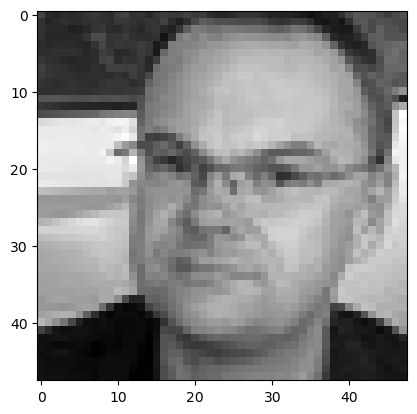

In [8]:
im = cv2.imread(train_angry_path[111])
im1 = Image.open(train_angry_path[111])
plt.imshow(im1, cmap='gray')
print(im.shape)

(48, 48, 3)


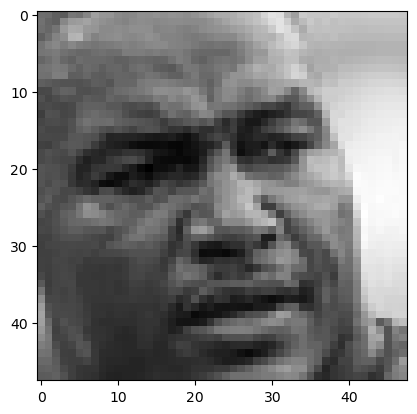

In [9]:
im = cv2.imread(train_fear_path[111])
im1 = Image.open(train_fear_path[111])
plt.imshow(im1, cmap='gray')
print(im.shape)

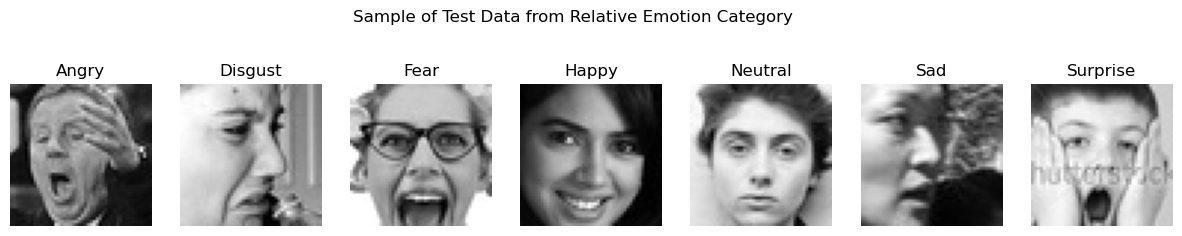

In [10]:
sample = [test_angry_path[0], test_disgust_path[0], test_fear_path[0], test_happy_path[0], test_neutral_path[0], test_sad_path[0], test_surprise_path[0]]
categories = ['Angry','Disgust','Fear','Happy','Neutral','Sad','Surprise']
fig, axs = plt.subplots(1, 7, figsize=(15, 3))

for i, image_path in enumerate(sample):
    img = Image.open(image_path)
    axs[i].imshow(img,cmap='gray') #adjust imshow colormap to map colors back to original grayscaled images, will be greenish images without this 
    axs[i].axis('off')
    axs[i].set_title(categories[i])

plt.suptitle('Sample of Test Data from Relative Emotion Category')
plt.show()


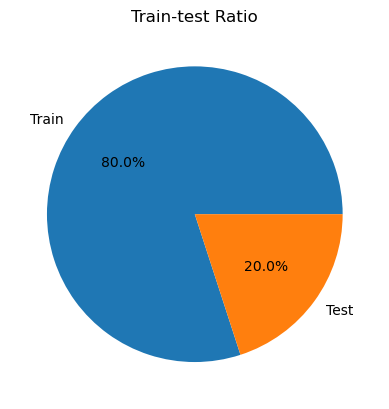

In [11]:
ratio = [len(train_path),len(test_path)]
labels = ['Train','Test']

plt.pie(ratio, labels=labels, autopct='%1.1f%%')
plt.title('Train-test Ratio')
plt.show()

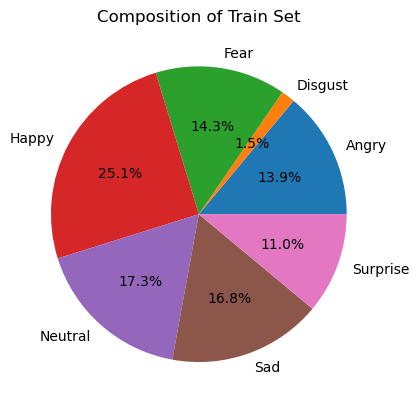

In [12]:
ratio = [len(train_angry_path),len(train_disgust_path),len(train_fear_path),len(train_happy_path),len(train_neutral_path),len(train_sad_path),len(train_surprise_path)]
labels = ['Angry','Disgust','Fear','Happy','Neutral','Sad','Surprise']

plt.pie(ratio, labels=labels, autopct='%1.1f%%')
plt.title('Composition of Train Set')
plt.show()

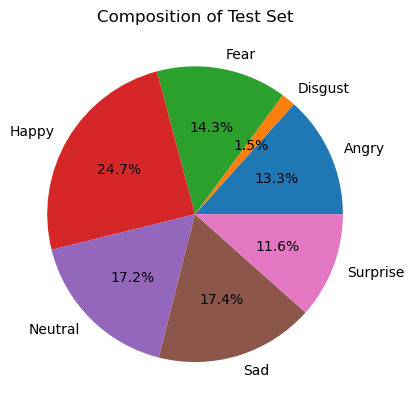

In [13]:
ratio = [len(test_angry_path),len(test_disgust_path),len(test_fear_path),len(test_happy_path),len(test_neutral_path),len(test_sad_path),len(test_surprise_path)]
labels = ['Angry','Disgust','Fear','Happy','Neutral','Sad','Surprise']

plt.pie(ratio, labels=labels, autopct='%1.1f%%')
plt.title('Composition of Test Set')
plt.show()

# Image Preprocessing

# Train Model

In [ ]:
#download libraries and packages
# !pip install imutils
# !pip install opencv-python
# !pip install tensorflow
# !pip install tensorflow_hub
# !pip install matplotlib

from imutils import paths
# from PIL import Image
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import random
import os
import tensorflow_hub as hub

In [2]:
batch_size = 16
img_height = 200 
img_width = 200 

In [3]:
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/cs/student/msc/aisd/2022/yintimun/Downloads/train', # directory path
    validation_split = None, 
    subset = None, 
    image_size = (img_height, img_width), # image size of height and width
    batch_size = batch_size # batch size
)

Found 28709 files belonging to 7 classes.


2023-08-17 10:05:06.019726: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-17 10:05:06.039146: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-17 10:05:06.039237: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [4]:
testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/cs/student/msc/aisd/2022/yintimun/Downloads/test', # directory path
    validation_split = None, 
    subset = None, 
    image_size = (img_height, img_width), # image size of height and width
    batch_size = batch_size # batch size
)

Found 7178 files belonging to 7 classes.


In [7]:
class_names = training_ds.class_names
print(class_names)
print(len(class_names))

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
7


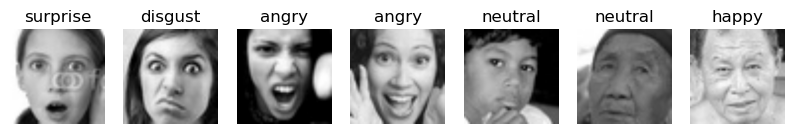

In [18]:
# show sample images from training set
image_batch, label_batch = next(iter(training_ds))
plt.figure(figsize=(10, 10)) # figure size
for i in range(7): # for 7 images
  ax = plt.subplot(1, 7, i + 1) # 7 images in 1 row
  plt.imshow(image_batch[i].numpy().astype("uint8")) # show images
  label = label_batch[i] # label of each image
  plt.title(class_names[label]) # title of each 
  plt.axis("off")

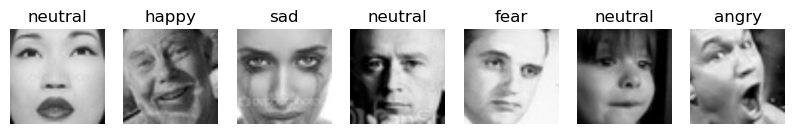

In [19]:
# show sample images from training set
image_batch, label_batch = next(iter(testing_ds))
plt.figure(figsize=(10, 10)) # figure size
for i in range(7): # for 7 images
  ax = plt.subplot(1, 7, i + 1) # 7 images in 1 row
  plt.imshow(image_batch[i].numpy().astype("uint8")) # show images
  label = label_batch[i] # label of each image
  plt.title(class_names[label]) # title of each 
  plt.axis("off")

In [5]:
# configuring dataset for performance
AUTOTUNE = tf.data.experimental.AUTOTUNE

# cache() keeps images in memory to ensure dataset does not become a bottleneck 
  # while training the model
# prefetch() overlaps data preprocessing and model execution while training
training_ds = training_ds.cache().prefetch(buffer_size = AUTOTUNE) # for training
testing_ds = testing_ds.cache().prefetch(buffer_size = AUTOTUNE) # for testing

In [6]:
# CNN model
CNN = tf.keras.models.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255), 
  layers.Conv2D(32, 3, activation = 'relu'),  # convolution layers
  layers.MaxPooling2D(), # maximum pooling layers
  layers.Conv2D(32, 3, activation = 'relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation = 'relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(256, 3, activation = 'relu'),
  layers.MaxPooling2D(),
  layers.GlobalAveragePooling2D(),
  layers.Dense(512, activation = 'relu'), # dense layer
  layers.Dense(7, activation =  'softmax') # soft-max layer
])

In [7]:
# CNN with adam optimiser, sparse categorical crossentropy loss, and accuracy metrics
CNN.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

In [8]:
# fit model to training and validation data, with 20 epochs
!pip install h5py
model_saved = CNN.fit(training_ds, validation_data= testing_ds, epochs = 20)

Defaulting to user installation because normal site-packages is not writeable
Epoch 1/20


2023-08-17 10:05:22.756086: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:437] Could not create cudnn handle: CUDNN_STATUS_NOT_INITIALIZED
2023-08-17 10:05:22.756139: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:441] Memory usage: 44367872 bytes free, 25425477632 bytes total.
2023-08-17 10:05:22.756339: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:451] Possibly insufficient driver version: 530.30.2
2023-08-17 10:05:22.756373: W tensorflow/core/framework/op_kernel.cc:1828] OP_REQUIRES failed at conv_ops_fused_impl.h:625 : UNIMPLEMENTED: DNN library is not found.


UnimplementedError: Graph execution error:

Detected at node 'sequential/conv2d/Relu' defined at (most recent call last):
    File "/opt/Python/Python-3.10.1/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/opt/Python/Python-3.10.1/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/cs/student/msc/aisd/2022/yintimun/.local/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/cs/student/msc/aisd/2022/yintimun/.local/lib/python3.10/site-packages/traitlets/config/application.py", line 1043, in launch_instance
      app.start()
    File "/cs/student/msc/aisd/2022/yintimun/.local/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 736, in start
      self.io_loop.start()
    File "/cs/student/msc/aisd/2022/yintimun/.local/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "/opt/Python/Python-3.10.1/lib/python3.10/asyncio/base_events.py", line 595, in run_forever
      self._run_once()
    File "/opt/Python/Python-3.10.1/lib/python3.10/asyncio/base_events.py", line 1881, in _run_once
      handle._run()
    File "/opt/Python/Python-3.10.1/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/cs/student/msc/aisd/2022/yintimun/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 516, in dispatch_queue
      await self.process_one()
    File "/cs/student/msc/aisd/2022/yintimun/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 505, in process_one
      await dispatch(*args)
    File "/cs/student/msc/aisd/2022/yintimun/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 412, in dispatch_shell
      await result
    File "/cs/student/msc/aisd/2022/yintimun/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 740, in execute_request
      reply_content = await reply_content
    File "/cs/student/msc/aisd/2022/yintimun/.local/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "/cs/student/msc/aisd/2022/yintimun/.local/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 546, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/cs/student/msc/aisd/2022/yintimun/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "/cs/student/msc/aisd/2022/yintimun/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "/cs/student/msc/aisd/2022/yintimun/.local/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/cs/student/msc/aisd/2022/yintimun/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/cs/student/msc/aisd/2022/yintimun/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/cs/student/msc/aisd/2022/yintimun/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_12216/488873942.py", line 3, in <module>
      model_saved = CNN.fit(training_ds, validation_data= testing_ds, epochs = 20)
    File "/cs/student/msc/aisd/2022/yintimun/.local/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/cs/student/msc/aisd/2022/yintimun/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 1742, in fit
      tmp_logs = self.train_function(iterator)
    File "/cs/student/msc/aisd/2022/yintimun/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 1338, in train_function
      return step_function(self, iterator)
    File "/cs/student/msc/aisd/2022/yintimun/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 1322, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/cs/student/msc/aisd/2022/yintimun/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 1303, in run_step
      outputs = model.train_step(data)
    File "/cs/student/msc/aisd/2022/yintimun/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 1080, in train_step
      y_pred = self(x, training=True)
    File "/cs/student/msc/aisd/2022/yintimun/.local/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/cs/student/msc/aisd/2022/yintimun/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 569, in __call__
      return super().__call__(*args, **kwargs)
    File "/cs/student/msc/aisd/2022/yintimun/.local/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/cs/student/msc/aisd/2022/yintimun/.local/lib/python3.10/site-packages/keras/src/engine/base_layer.py", line 1150, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/cs/student/msc/aisd/2022/yintimun/.local/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/cs/student/msc/aisd/2022/yintimun/.local/lib/python3.10/site-packages/keras/src/engine/sequential.py", line 405, in call
      return super().call(inputs, training=training, mask=mask)
    File "/cs/student/msc/aisd/2022/yintimun/.local/lib/python3.10/site-packages/keras/src/engine/functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/cs/student/msc/aisd/2022/yintimun/.local/lib/python3.10/site-packages/keras/src/engine/functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/cs/student/msc/aisd/2022/yintimun/.local/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/cs/student/msc/aisd/2022/yintimun/.local/lib/python3.10/site-packages/keras/src/engine/base_layer.py", line 1150, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/cs/student/msc/aisd/2022/yintimun/.local/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/cs/student/msc/aisd/2022/yintimun/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py", line 321, in call
      return self.activation(outputs)
    File "/cs/student/msc/aisd/2022/yintimun/.local/lib/python3.10/site-packages/keras/src/activations.py", line 321, in relu
      return backend.relu(
    File "/cs/student/msc/aisd/2022/yintimun/.local/lib/python3.10/site-packages/keras/src/backend.py", line 5397, in relu
      x = tf.nn.relu(x)
Node: 'sequential/conv2d/Relu'
DNN library is not found.
	 [[{{node sequential/conv2d/Relu}}]] [Op:__inference_train_function_1621]

In [34]:
CNN.save(os.path.join("/Users/janrauhl/Documents/Dissertation/FER","mpg_model.h5"))

/opt/homebrew/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [116]:
test_loss, test_accuracy = CNN.evaluate(testing_ds, steps= 10)

10/10 [==============================] - 0s 22ms/step - loss: 1.1904 - accuracy: 0.5688


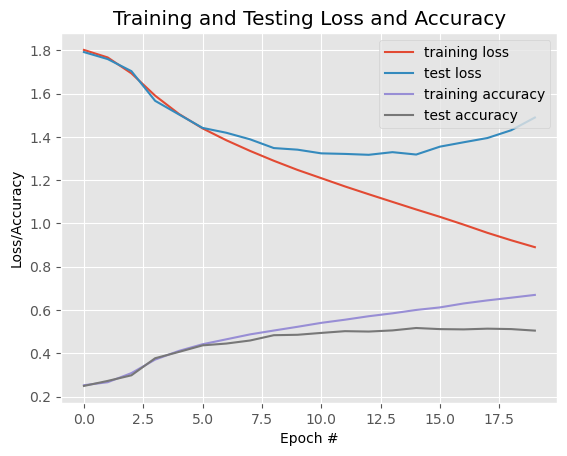

In [117]:
N = 20
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), model_saved.history['loss'], 
         label = 'training loss') # training loss
plt.plot(np.arange(0, N), model_saved.history['val_loss'], 
         label = 'test loss') # testing loss
plt.plot(np.arange(0, N), model_saved.history['accuracy'], 
         label = 'training accuracy') # training accuracy
plt.plot(np.arange(0, N), model_saved.history['val_accuracy'], 
         label = 'test accuracy') # testing accuracy
plt.title("Training and Testing Loss and Accuracy") # title of comparative line graph
plt.xlabel("Epoch #") # x axis label
plt.ylabel("Loss/Accuracy") # y axis label
plt.legend(loc = "upper right") # legend

# Test

In [34]:
model =tf.keras.models.load_model('/Users/janrauhl/Documents/Dissertation/FER/mpg_model.h5', 
                                   custom_objects={'KerasLayer': hub.KerasLayer})

(48, 48, 3)


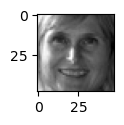

In [21]:
index = random.randint(0, len(test_path))
path = test_path[index]
im = cv2.imread(path)
im1 = Image.open(path)
fig = plt.figure(figsize=(1, 1))
plt.imshow(im1, cmap='gray')
print(im.shape)

In [22]:
img = plt.imread(path) # image path
img = cv2.resize(img,(200,200)) # image size of 200 x 200 image size
imageSegment = np.array(img, dtype='uint8')
# Add an additional dimension for the channel
imageSegment = np.expand_dims(imageSegment, axis=-1)
# Reshape to match the expected shape
imageSegment = np.repeat(imageSegment, 3, axis=-1)

In [23]:
class_labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
pred_probabilities = model.predict(np.array([imageSegment]))
predicted_class = np.argmax(pred_probabilities)
predicted_class_label = class_labels[predicted_class]

print(predicted_class_label)


1/1 [==============================] - 0s 173ms/step
happy


In [24]:
pred_probabilities

array([[2.4741623e-04, 5.3781721e-05, 1.6072803e-04, 9.9776328e-01,
        1.2799198e-03, 3.4490309e-04, 1.4999183e-04]], dtype=float32)

In [25]:
def detect(img_path):
    img = plt.imread(img_path) # image path
    img = cv2.resize(img,(200,200)) # image size of 200 x 200 image size
    
    imageSegment = np.array(img, dtype='uint8')
    # Add an additional dimension for the channel
    imageSegment = np.expand_dims(imageSegment, axis=-1)
    # Reshape to match the expected shape
    imageSegment = np.repeat(imageSegment, 3, axis=-1)
    # predict probability of target class labels
    pred_probabilities = model.predict(np.array([imageSegment]))
    predicted_class = np.argmax(pred_probabilities)
    predicted_class_label = class_labels[predicted_class]
    imageSegment = cv2.putText(img, predicted_class_label, (30, 50),
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
    fig = plt.figure(figsize=(1, 1))
    plt.imshow(imageSegment,cmap='gray')  # display image
    print(predicted_class_label)


1/1 [==============================] - 0s 12ms/step
happy


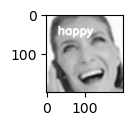

In [26]:
index2 = random.randint(0, len(test_path))
path2 = test_path[index2]
detect(path2)


In [29]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 460.4/460.4 kB 5.4 MB/s eta 0:00:0000:0100:01


In [35]:
import shap
import tensorflow as tf
import numpy as np
from PIL import Image

# Load your pre-trained CNN model here
# model = tf.keras.applications.MobileNetV2(weights='imagenet')

# Create an "explainer" object using the pre-trained model
explainer = shap.Explainer(model)

# Load and preprocess the image from the given path
image_path = test_path[index2]
image = Image.open(image_path)  # Load the image using PIL (you can also use OpenCV or other libraries)

# Resize the image to a smaller size to reduce the number of features
# Adjust the size according to your computational resources and requirements
image = image.resize((64, 64))

# Preprocess the image to match the format expected by the CNN model
# For example, if you are using MobileNetV2, you may need to normalize the image
# Replace the preprocessing steps with the appropriate ones for your specific model
image = np.array(image)  # Convert the PIL image to a numpy array
image = image.astype('float32') / 255.0  # Normalize the pixel values (assuming MobileNetV2's input range is [0, 1])
image = np.expand_dims(image, axis=0)  # Add batch dimension as the model expects a batch of images

# Compute Shapley values for the preprocessed image
shap_values = explainer.shap_values(image)

# Plot the Shapley values to understand feature contributions
shap.image_plot(shap_values, -image)  # The -image inverts the color to be more intuitive


ValueError: max_evals=640 is too low for the Permutation explainer, it must be at least 2 * num_features + 1 = 8193!

In [132]:
!python setup.py install

running install
/opt/homebrew/anaconda3/lib/python3.10/site-packages/setuptools/command/install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/setuptools/command/easy_install.py:144: EasyInstallDeprecationWarning: easy_install command is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
running bdist_egg
running egg_info
creating hsemotion_onnx.egg-info
writing hsemotion_onnx.egg-info/PKG-INFO
writing dependency_links to hsemotion_onnx.egg-info/dependency_links.txt
writing requirements to hsemotion_onnx.egg-info/requires.txt
writing top-level names to hsemotion_onnx.egg-info/top_level.txt
writing manifest file 'hsemotion_onnx.egg-info/SOURCES.txt'
reading manifest file 'hsemotion_onnx.egg-info/SOURCES.txt'
writing manifest file 'hsemotion_onnx.egg-info/SOURCES.txt'
installing library code to build/bdist.macosx-11.1-

In [134]:
model = torch.load('/Users/janrauhl/Downloads/enet_b2_8_best.pt')
print(model)

ImportError: cannot import name '_get_cpp_backtrace' from 'torch._C' (/opt/homebrew/anaconda3/lib/python3.10/site-packages/torch/_C.cpython-310-darwin.so)

In [142]:
!pip install hsemotion

  Preparing metadata (setup.py) ... done
  Created wheel for hsemotion: filename=hsemotion-0.3.0-py3-none-any.whl size=11242 sha256=6a40cd98aa0e69a44cf1b64b094892bfa7215d63f0f9aee7c17eff255c8e4fb7
  Stored in directory: /Users/janrauhl/Library/Caches/pip/wheels/13/f7/7f/7e063eaa4c7c580cf13c76c72445534c832af263ec9f5c286c
Successfully built hsemotion


In [145]:
!pip install torch --upgrade
!pip install torchvision --upgrade


In [1]:
import torch
import torchvision

print(torch.__version__)
print(torchvision.__version__)



2.0.1
0.15.2


In [153]:
!pip uninstall torch --yes
!pip uninstall torchvision --yes
!pip install torchvision
!pip install torch



Found existing installation: torch 2.0.1
Uninstalling torch-2.0.1:
  Successfully uninstalled torch-2.0.1
Found existing installation: torchvision 0.15.2
Uninstalling torchvision-0.15.2:
  Successfully uninstalled torchvision-0.15.2
  Using cached torchvision-0.15.2-cp310-cp310-macosx_11_0_arm64.whl (1.4 MB)
  Using cached torch-2.0.1-cp310-none-macosx_11_0_arm64.whl (55.8 MB)


In [12]:
!pip install timm


In [13]:
from hsemotion.facial_emotions import HSEmotionRecognizer

img = plt.imread(path) # image path
img = cv2.resize(img,(200,200)) # image size of 200 x 200 image size
imageSegment = np.array(img, dtype='uint8')
# Add an additional dimension for the channel
imageSegment = np.expand_dims(imageSegment, axis=-1)
# Reshape to match the expected shape
imageSegment = np.repeat(imageSegment, 3, axis=-1)

model_name='enet_b0_8_best_afew'
fer=HSEmotionRecognizer(model_name=model_name)
emotion,scores=fer.predict_emotions(imageSegment,logits=False)

ModuleNotFoundError: No module named 'timm.models.layers.conv2d_same'

In [14]:
from hsemotion.facial_emotions import HSEmotionRecognizer
from timm.models.layers import
model_name='enet_b0_8_best_afew'
fer=HSEmotionRecognizer(model_name=model_name,device='cpu') # device is cpu or gpu
emotion,scores=fer.predict_emotions(face_img,logits=True)

ModuleNotFoundError: No module named 'timm.models.layers.conv2d_same'

In [12]:
for images, labels in training_ds:
    print(labels.shape)
    print(labels)
    break

for images, labels in testing_ds:
    print(labels.shape)
    print(labels)
    break


(16,)
tf.Tensor([5 2 4 6 0 5 4 0 3 6 0 5 2 6 3 5], shape=(16,), dtype=int32)
(16,)
tf.Tensor([6 5 4 4 4 4 3 2 5 2 4 4 5 4 5 2], shape=(16,), dtype=int32)


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get('accuracy')>=0.995):
            print("\nReached 99.5% accuracy so cancelling training!")
            self.model.stop_training = True

In [13]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
img_height = 200 
img_width = 200 
img_channels = 3

num_classes = len(training_ds.class_names)

# One-hot encode the labels
def one_hot_encode(image, label):
    label = tf.one_hot(label, num_classes)
    return image, label

# Apply one-hot encoding to the dataset
training_ds = training_ds.map(one_hot_encode)
testing_ds = testing_ds.map(one_hot_encode)

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, img_channels))
for layer in base_model.layers:
    layer.trainable = False

model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu'))
model.add(Dense(7, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_saved = model.fit(training_ds, validation_data= testing_ds, epochs = 20)
model.save(os.path.join("/Users/janrauhl/Documents/Dissertation/FER","vgg_base.h5"))

Epoch 1/20
1795/1795 [==============================] - 1450s 808ms/step - loss: 1.5615 - accuracy: 0.4338 - val_loss: 1.4427 - val_accuracy: 0.4451
Epoch 2/20
1795/1795 [==============================] - 1585s 883ms/step - loss: 1.3339 - accuracy: 0.4978 - val_loss: 1.4196 - val_accuracy: 0.4634
Epoch 3/20
1795/1795 [==============================] - 1597s 890ms/step - loss: 1.2660 - accuracy: 0.5256 - val_loss: 1.4221 - val_accuracy: 0.4620
Epoch 4/20
1795/1795 [==============================] - 1605s 894ms/step - loss: 1.2095 - accuracy: 0.5455 - val_loss: 1.3593 - val_accuracy: 0.4972
Epoch 5/20
1795/1795 [==============================] - 6295s 4s/step - loss: 1.1564 - accuracy: 0.5692 - val_loss: 1.4006 - val_accuracy: 0.4848
Epoch 6/20
1795/1795 [==============================] - 13969s 8s/step - loss: 1.1000 - accuracy: 0.5895 - val_loss: 1.4341 - val_accuracy: 0.4811
Epoch 7/20
1795/1795 [==============================] - 1859s 1s/step - loss: 1.0482 - accuracy: 0.6109 - val_l

/opt/homebrew/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [14]:
model.save(os.path.join("/Users/janrauhl/Documents/Dissertation/FER","vgg_base.keras"))

In [10]:
!pip install efficientnet

Defaulting to user installation because normal site-packages is not writeable
  Using cached Keras_Applications-1.0.8-py3-none-any.whl (50 kB)
  Obtaining dependency information for scikit-image from https://files.pythonhosted.org/packages/70/a9/a9f63dde69ac5a4451d8a0ebdde95824ec31aafcae1c77658a9058e27bb7/scikit_image-0.21.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for scipy>=1.8 from https://files.pythonhosted.org/packages/14/f2/10fa23f0a6b9b2439c01579ae4a9b1849d4822e972515c8f92584bfda5e9/scipy-1.11.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 47.2 MB/s eta 0:00:000m eta 0:00:01
  Obtaining dependency information for imageio>=2.27 from https://files.pythonhosted.org/packages/c7/b0/7b6c35b8636ed773325cdb6f5ac3cd36afba63d99e20ed59c521cf5018b4/imageio-2.31.1-py3-none-

In [12]:
!pip install --upgrade certifi

Defaulting to user installation because normal site-packages is not writeable


In [17]:
import certifi
import ssl

ssl._create_default_https_context = ssl._create_default_https_context

# Set up SSL context with custom certificate authority (CA) file
ssl_context = ssl.create_default_context(cafile=certifi.where())

import ssl
ssl._create_default_https_context = ssl._create_unverified_context


In [37]:
import tensorflow as tf

tf.config.optimizer.set_experimental_options({"layout_optimizer": False})


In [41]:
'abc' *3 

'abcabcabc'

In [40]:
from tensorflow.keras.applications.efficientnet import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
# num_classes = len(training_ds.class_names)
# One-hot encode the labels
def one_hot_encode(image, label):
    label = tf.one_hot(label, num_classes)
    return image, label

# # Apply one-hot encoding to the dataset
# training_ds = training_ds.map(one_hot_encode)
# testing_ds = testing_ds.map(one_hot_encode)

img_channels = 3
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(img_height, img_width, img_channels))
for layer in base_model.layers:
    layer.trainable = False

effnet = Sequential()
effnet.add(base_model)
effnet.add(GlobalAveragePooling2D())
effnet.add(Dense(256, activation='relu'))
effnet.add(Dense(num_classes, activation='softmax'))
effnet.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_saved = effnet.fit(training_ds, validation_data=testing_ds, epochs=20)
# effnet.save("/Users/janrauhl/Documents/Dissertation/FER/efficientnet_base.h5")

Epoch 1/20


InvalidArgumentError: Graph execution error:

2 root error(s) found.
  (0) INVALID_ARGUMENT:  Unknown image file format. One of JPEG, PNG, GIF, BMP required.
	 [[{{node decode_image/DecodeImage}}]]
	 [[IteratorGetNext]]
	 [[IteratorGetNext/_4]]
  (1) INVALID_ARGUMENT:  Unknown image file format. One of JPEG, PNG, GIF, BMP required.
	 [[{{node decode_image/DecodeImage}}]]
	 [[IteratorGetNext]]
0 successful operations.
0 derived errors ignored. [Op:__inference_train_function_68335]

In [8]:
from tensorflow.keras.applications import MobileNet
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(img_height, img_width, img_channels))
for layer in base_model.layers:
    layer.trainable = False

mobnet = Sequential()
mobnet.add(base_model)
mobnet.add(GlobalAveragePooling2D())
mobnet.add(Dense(256, activation='relu'))
mobnet.add(Dense(num_classes, activation='softmax'))

mobnet.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_saved = mobnet.fit(training_ds, validation_data=testing_ds, epochs=20)
# mobnet.save("/Users/janrauhl/Documents/Dissertation/FER/mobilenet_base.h5")

NameError: name 'img_channels' is not defined

In [19]:
from tensorflow.keras.applications.resnet50 import ResNet50
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_height, img_width, img_channels))
for layer in base_model.layers:
    layer.trainable = False

resnet = Sequential()
resnet.add(base_model)
resnet.add(GlobalAveragePooling2D())
resnet.add(Dense(256, activation='relu'))
resnet.add(Dense(num_classes, activation='softmax'))

resnet.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_saved = resnet.fit(training_ds, validation_data=testing_ds, epochs=20)
resnet.save("/Users/janrauhl/Documents/Dissertation/FER/resnet_base.h5")

94765736/94765736 [==============================] - 20s 0us/step
Epoch 1/20
1795/1795 [==============================] - 6597s 4s/step - loss: 1.4080 - accuracy: 0.4645 - val_loss: 1.3116 - val_accuracy: 0.4987
Epoch 2/20
1795/1795 [==============================] - 551s 307ms/step - loss: 1.2444 - accuracy: 0.5270 - val_loss: 1.2529 - val_accuracy: 0.5276
Epoch 3/20
1795/1795 [==============================] - 23555s 13s/step - loss: 1.1746 - accuracy: 0.5553 - val_loss: 1.2250 - val_accuracy: 0.5332
Epoch 4/20
1795/1795 [==============================] - 48577s 27s/step - loss: 1.1108 - accuracy: 0.5815 - val_loss: 1.2699 - val_accuracy: 0.5183
Epoch 5/20
1795/1795 [==============================] - 10895s 6s/step - loss: 1.0555 - accuracy: 0.6073 - val_loss: 1.3134 - val_accuracy: 0.5160
Epoch 6/20
1795/1795 [==============================] - 2473s 1s/step - loss: 1.0052 - accuracy: 0.6234 - val_loss: 1.2975 - val_accuracy: 0.5195
Epoch 7/20
1795/1795 [=============================

In [20]:
from tensorflow.keras.applications.densenet import DenseNet121
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(img_height, img_width, img_channels))
for layer in base_model.layers:
    layer.trainable = False

densenet = Sequential()
densenet.add(base_model)
densenet.add(GlobalAveragePooling2D())
densenet.add(Dense(256, activation='relu'))
densenet.add(Dense(num_classes, activation='softmax'))

densenet.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_saved = densenet.fit(training_ds, validation_data=testing_ds, epochs=20)
densenet.save("/Users/janrauhl/Documents/Dissertation/FER/densenet_base.h5")

29084464/29084464 [==============================] - 6s 0us/step
Epoch 1/20
1795/1795 [==============================] - 543s 302ms/step - loss: 1.8838 - accuracy: 0.2833 - val_loss: 1.7020 - val_accuracy: 0.3206
Epoch 2/20
1795/1795 [==============================] - 6715s 4s/step - loss: 1.6850 - accuracy: 0.3237 - val_loss: 1.6708 - val_accuracy: 0.3254
Epoch 3/20
1795/1795 [==============================] - 1584s 883ms/step - loss: 1.6575 - accuracy: 0.3412 - val_loss: 1.6515 - val_accuracy: 0.3399
Epoch 4/20
1795/1795 [==============================] - 525s 292ms/step - loss: 1.6379 - accuracy: 0.3523 - val_loss: 1.6454 - val_accuracy: 0.3346
Epoch 5/20
1795/1795 [==============================] - 524s 292ms/step - loss: 1.6179 - accuracy: 0.3622 - val_loss: 1.6637 - val_accuracy: 0.3430
Epoch 6/20
1795/1795 [==============================] - 529s 294ms/step - loss: 1.6061 - accuracy: 0.3672 - val_loss: 1.6223 - val_accuracy: 0.3494
Epoch 7/20
1795/1795 [==========================

In [21]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_height, img_width, img_channels))
for layer in base_model.layers:
    layer.trainable = False

incnet = Sequential()
incnet.add(base_model)
incnet.add(GlobalAveragePooling2D())
incnet.add(Dense(256, activation='relu'))
incnet.add(Dense(num_classes, activation='softmax'))

incnet.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_saved = incnet.fit(training_ds, validation_data=testing_ds, epochs=20)
incnet.save("/Users/janrauhl/Documents/Dissertation/FER/inception_net_base.h5")

87910968/87910968 [==============================] - 19s 0us/step
Epoch 1/20
1795/1795 [==============================] - 2802s 2s/step - loss: 3.1633 - accuracy: 0.2403 - val_loss: 1.8286 - val_accuracy: 0.2471
Epoch 2/20
1795/1795 [==============================] - 524s 292ms/step - loss: 1.8167 - accuracy: 0.2518 - val_loss: 1.8150 - val_accuracy: 0.2471
Epoch 3/20
1795/1795 [==============================] - 305s 170ms/step - loss: 1.8108 - accuracy: 0.2515 - val_loss: 1.8138 - val_accuracy: 0.2470
Epoch 4/20
1795/1795 [==============================] - 856s 477ms/step - loss: 1.8098 - accuracy: 0.2516 - val_loss: 1.8131 - val_accuracy: 0.2473
Epoch 5/20
1795/1795 [==============================] - 307s 171ms/step - loss: 1.8097 - accuracy: 0.2516 - val_loss: 1.8130 - val_accuracy: 0.2473
Epoch 6/20
1795/1795 [==============================] - 2199s 1s/step - loss: 1.8096 - accuracy: 0.2516 - val_loss: 1.8130 - val_accuracy: 0.2473
Epoch 7/20
1795/1795 [============================

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization, Dropout
from tensorflow.keras.models import Model

batch_size = 32
img_height = 224
img_width = 224 

inputs = layers.Input(shape=(img_height, img_width, 3))
x = inputs
vgg_tl = VGG16(include_top=False, input_tensor=x, weights="imagenet")

# Freeze the pretrained weights
vgg_tl.trainable = False

# Build the custom top layers
x = vgg_tl.output
x = GlobalAveragePooling2D()(x) 
x = Dense(128, activation = 'relu')(x) 
x = Dropout(0.5)(x) 
output = Dense(num_classes, activationi = 'softmax')(x) 
vgg_tl.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model_saved = vgg_tl.fit(training_ds_resized, validation_data=testing_ds_resized, batch_size=batch_size, epochs=20, callbacks=callbacks)
test_loss, test_accuracy = model.evaluate(testing_ds_resized)
print("Test accuracy:", test_accuracy)